In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv")

In [3]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


>## Question 1

how to merge two lists

In [8]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

> ## Question 2

How to create an identity matrix

In [9]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

> ## Question 3 

which fuel type has the least average fuel cost per unit burned

In [27]:
df.groupby('fuel_type_code_pudl').fuel_cost_per_unit_burned.mean().sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

>## Question 4 

Calculation he standard deviation and 75th

In [15]:
#standard deviation pf the energy per unit

std = df.fuel_mmbtu_per_unit.std()
std =round(std,2)

#75th percentile of the energy per unit
percentile = df.fuel_mmbtu_per_unit.quantile(0.75)
percentile = round(percentile,2)

print(std,percentile)

10.6 17.01


The standard deviaion and 75th percentile are 10.6 and 17.01 respectively to 
2 d.p

> ## Question 5

calculate skewness and kurtosis of the data to 2 decimal places

In [16]:
#the skewness of the fuel quantity burned

skew = round(df.fuel_qty_burned.skew(),2)

#the kurtosis of the fuel quantity burned
kurt = round(df.fuel_qty_burned.kurtosis(),2)

print(skew, kurt)

15.85 651.37


The skewness and Kurtosis are 15.85 and 651.37 respectively

> ## Question 6

Missing value in the dataset

In [19]:
#missing value

df.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [20]:
#percentage of the missing value in the other rows

sum(df.isna().sum()/len(df))*100

0.609694136774718

Feature: 'fuel_unit', Total:180, Percent: 0.61%

> ## Question 7

Which type of imputation would you use for the missing

In [21]:
#to know the type of value imputation to use we need to know the type of data
df.fuel_unit
#the datatype of its content is 'object' ,implying strings, so categorical and 
# mode imputations are better suited


0        ton
1        ton
2        ton
3        ton
4        mcf
        ... 
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: object

>## Question 8

To find the correlation between Fuel cost per unit burned and other features

In [28]:
corr = df.corr()['fuel_cost_per_unit_burned'].sort_values()
corr

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

It can be seen that fuel_qty_burned and fuel_mmbtu_per_unit are the seconf and third lowest

>## Question 9

Percentage change in the fuel cost per unit burned from 1994 to 1998

In [24]:
a = df.fuel_cost_per_unit_burned[(df.fuel_type_code_pudl =='coal')& (df.report_year == 1994)].sum()

b = df.fuel_cost_per_unit_burned[(df.fuel_type_code_pudl =='coal')& (df.report_year == 1998)].sum()

c =((b-a)/a) * 100
c

-20.56765451826053

Percentage change is -20.567 %  (~ -21%)

> ## Question 10

To calculate the year with the highest cost per unit delivered

In [26]:
df.groupby('report_year').fuel_cost_per_unit_delivered.mean().sort_values()

report_year
1999       25.551627
1995       32.735269
2006       38.657484
2005       41.438184
2007       43.325023
2017       46.196861
2002       47.594361
2003       55.663493
2008       58.588197
2011       59.774667
2001       60.050396
2012       60.994502
1994       63.636060
2010       91.862105
2016      103.901761
2004      139.524275
2013      172.307591
2014      192.737183
1998      287.154420
2015      326.535511
2018      499.269966
2009      652.694163
2000      985.362877
1996     9196.705948
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64

the year with the highest is 1997

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use('ggplot')


In [3]:

#reads the dataset into the script
pdf = pd.read_csv("dataset/fuel_data.csv")
pdf.drop('Unnamed: 0', 1, inplace = True)

#because the names were too long, i reduced their lengths
pdf = pdf.rename(columns= {'fuel_type_code_pudl':'fuel_type',
                    'plant_name_ferc1':'plant_name',
                    'report_year':'year', 'utility_id_ferc1':'utility_id',
                    'fuel_qty_burned':'fuel_burned',
                    'fuel_mmbtu_per_unit': 'mmbtu_per_unit',
                    'fuel_cost_per_unit_burned':'cpu_burned',
                    'fuel_cost_per_unit_delivered':'cpu_delivered',
                    'fuel_cost_per_mmbtu': 'cpu_mmbtu' })

pdf.head()


,record_id,utility_id,year,plant_name,fuel_type,fuel_unit,fuel_burned,mmbtu_per_unit,cpu_burned,cpu_delivered,cpu_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:

"""
Performing an Exploratory Data Analysis (EDA) on the dataset
To check for the year in which the cost per unit burned of gas was at its peak
there are several ways to do this
Option A:
    We could iterate through the years, and find the sum for each filtered
    dataframe consisting of the desired fuel type keeping the cost per unit
    burned feature constant
Option B:
    We can also use the pandas function, groupby
"""


'\nPerforming an Exploratory Data Analysis (EDA) on the dataset\nTo check for the year in which the cost per unit burned of gas was at its peak\nthere are several ways to do this\nOption A:\n    We could iterate through the years, and find the sum for each filtered\n    dataframe consisting of the desired fuel type keeping the cost per unit\n    burned feature constant\nOption B:\n    We can also use the pandas function, groupby\n'

In [5]:
#Oprion A
highest, list_of_sum = 0, []
for year in pdf['year'].unique():
    total = pdf['cpu_burned'][(pdf.year== year)& (pdf.fuel_type=='gas')].sum()
    if total>highest:
        highest = total
        highestyear = year
    list_of_sum.append(total)

print(f'The year when gas cost per unit was at its highest was {highestyear}'+
        f'at {highest} mcf')



The year when gas cost per unit was at its highest was 1999at 16767.895 mcf


In [6]:
#Option B
df = pdf[pdf['fuel_type']=='gas'].groupby('year').sum()
list_of_sum_2 = list(df['cpu_burned'].round(decimals =3))

print(max(list_of_sum_2))
#You can see the results are equal


16767.895


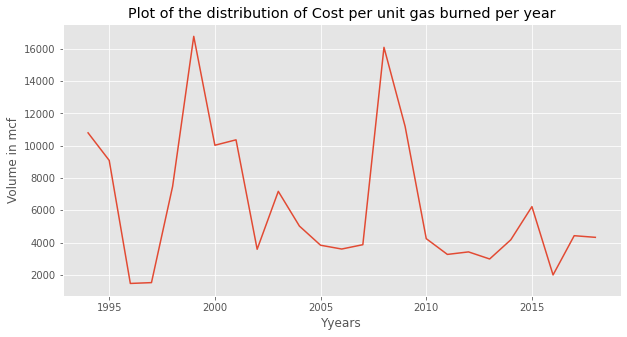

In [7]:
#To plot this data, you can do the following

sumlist = np.array(list_of_sum)           #this converts the list into a numpy array
plt.figure(figsize = (10,5))
plt.plot(pdf.year.unique(), sumlist)
plt.xlabel('Yyears')
plt.ylabel('Volume in mcf')
plt.title('Plot of the distribution of Cost per unit gas burned per year')
plt.show()


In [10]:
pdf.isna().sum()

record_id           0
utility_id          0
year                0
plant_name          0
fuel_type           0
fuel_unit         180
fuel_burned         0
mmbtu_per_unit      0
cpu_burned          0
cpu_delivered       0
cpu_mmbtu           0
dtype: int64

In [12]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   record_id       29523 non-null  object 
 1   utility_id      29523 non-null  int64  
 2   year            29523 non-null  int64  
 3   plant_name      29523 non-null  object 
 4   fuel_type       29523 non-null  object 
 5   fuel_unit       29343 non-null  object 
 6   fuel_burned     29523 non-null  float64
 7   mmbtu_per_unit  29523 non-null  float64
 8   cpu_burned      29523 non-null  float64
 9   cpu_delivered   29523 non-null  float64
 10  cpu_mmbtu       29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [14]:
pdf.fuel_unit.fillna(method='bfill')

0        ton
1        ton
2        ton
3        ton
4        mcf
        ... 
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: object

In [16]:
pdf.fuel_unit.value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [17]:
pdf.corr()

,utility_id,year,fuel_burned,mmbtu_per_unit,cpu_burned,cpu_delivered,cpu_mmbtu
utility_id,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
cpu_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
cpu_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
cpu_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000
